In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import numpy as np

In [3]:
#First we need to create the dataframe:
Station_A = [9.867,14.035,10.7,13.853,7.067,11.67,7.357,3.358,
            4.210,3.630,2.953,2.640]
Station_B = [3.723,8.416,20.723,9.168,4.778,9.145,8.463,4.086,4.233,
            2.320,3.843,3.610]
Station_C = [4.410,11.100,4.470,8.010,34.080,8.990,3.350,4.500,6.830,
            5.800,3.480,3.020]
df = pd.DataFrame()
df['Station_A'] = Station_A
df['Station_B'] = Station_B
df['Station_C'] = Station_C
df.index = ['January','February','March','April','May',
           'June','July','August','September','October','November',
            'December']

In [4]:
#Part A:
#To flag outlier points, we must first establish the Chauvenet criteria
#and then loop through the dataframe and identify outlier points
mn = df.mean().values
stds = df.std().values
n = len(df.index)
def chauvenet(df):
    mn = df.mean()
    std = df.std()
    n = len(df.index)
    dmax = std*(0.891 + 0.544*math.log(n)-0.02346*math.log(n**2))
    
    error_flag = []
    for i in df:
        if np.abs(i-mn) > dmax:
            error_flag.append(i)
    return error_flag

errs_A = chauvenet(df['Station_A'])    
errs_B = chauvenet(df['Station_B'])  
errs_C = chauvenet(df['Station_C'])         
    
    

In [5]:
#Problematic points for station_A
errs_A

[]

In [6]:
#Problematic points for station_B
errs_B

[20.723]

In [7]:
#Problematic points for station_C
errs_C

[34.08]

In [8]:
#Part B: Computing relevant statistical measures
#Calculating means, standard deviations, medians, maximums, minimums, and interquartile ranges
df.describe()
#Note - 25% to 75% is the IQR of each
#Note - 50% is the median

,Station_A,Station_B,Station_C
count,12.000000,12.000000,12.000000
mean,7.611667,6.875667,8.170000
std,4.302311,5.016036,8.533735
min,2.640000,2.320000,3.020000
25%,3.562000,3.813000,4.177500
50%,7.212000,4.505500,5.150000
75%,10.942500,8.633500,8.255000
max,14.035000,20.723000,34.080000


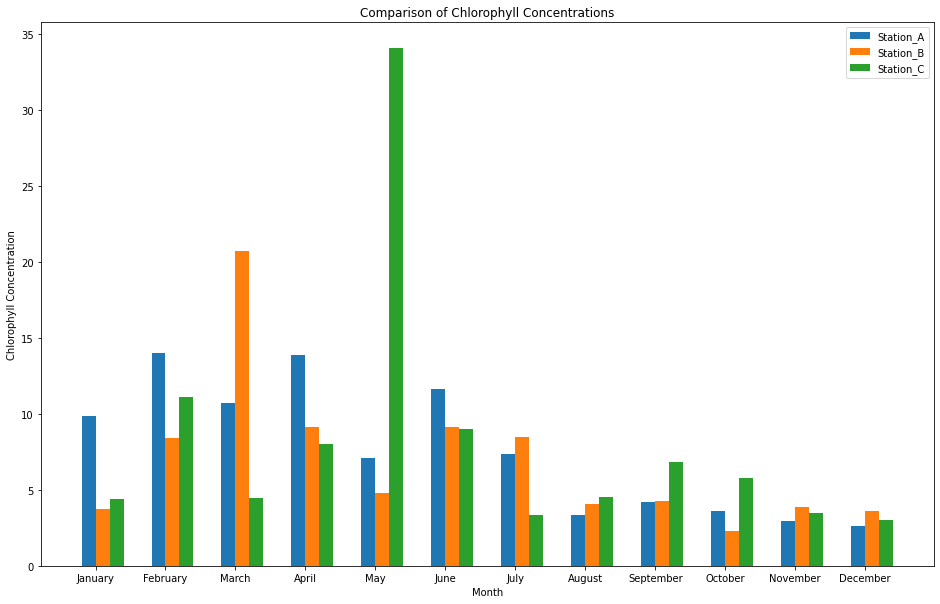

In [22]:
#Part C: Generating pertinent graphical plots

#First, we create a side-by-side bar chart comparing the values for each month
X_axis = np.arange(len(df.index))*2 #the *2 is necessary to scale the x-axis to fit the third bar
plt.figure(figsize=(16,10))
  
plt.bar(X_axis - 0.2, df['Station_A'], 0.4, label = 'Station_A')
plt.bar(X_axis + 0.2, df['Station_B'], 0.4, label = 'Station_B')
plt.bar(X_axis + 0.6, df['Station_C'], 0.4, label = 'Station_C')
  
plt.xticks(X_axis, df.index)
plt.xlabel("Month")
plt.ylabel("Chlorophyll Concentration")
plt.title("Comparison of Chlorophyll Concentrations")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Histogram of Chlorophyll Concentrations')

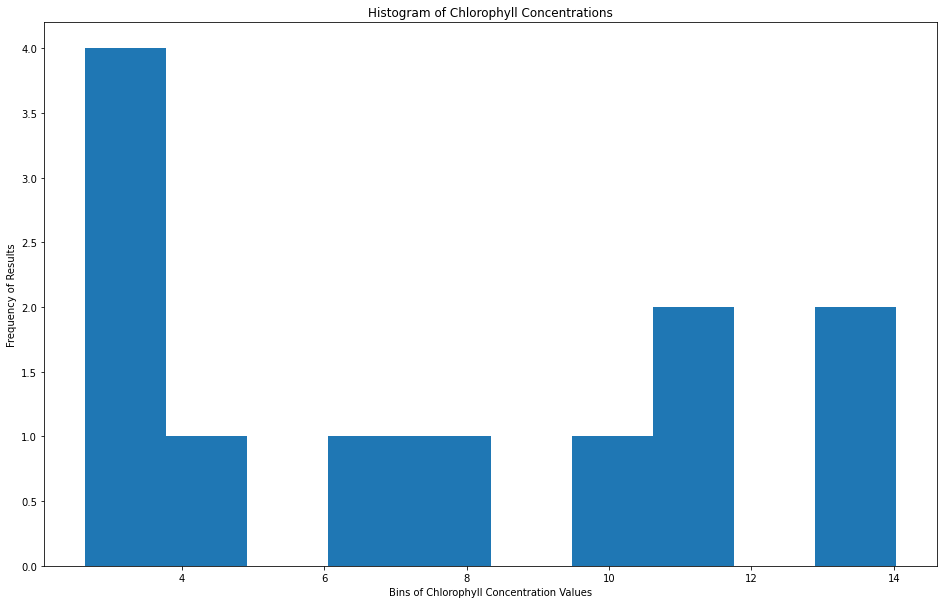

In [31]:
#Then, we create a histogram that describes all of the data
#This requires making a list of all the data and using that
stations = Station_A + Station_B + Station_C
plt.figure(figsize=(16,10))
plt.hist(stations)
plt.xlabel("Bins of Chlorophyll Concentration Values")
plt.ylabel("Frequency of Results")
plt.title("Histogram of Chlorophyll Concentrations")

Text(0.5, 1.0, 'Chlorophyll Concentrations Station C')

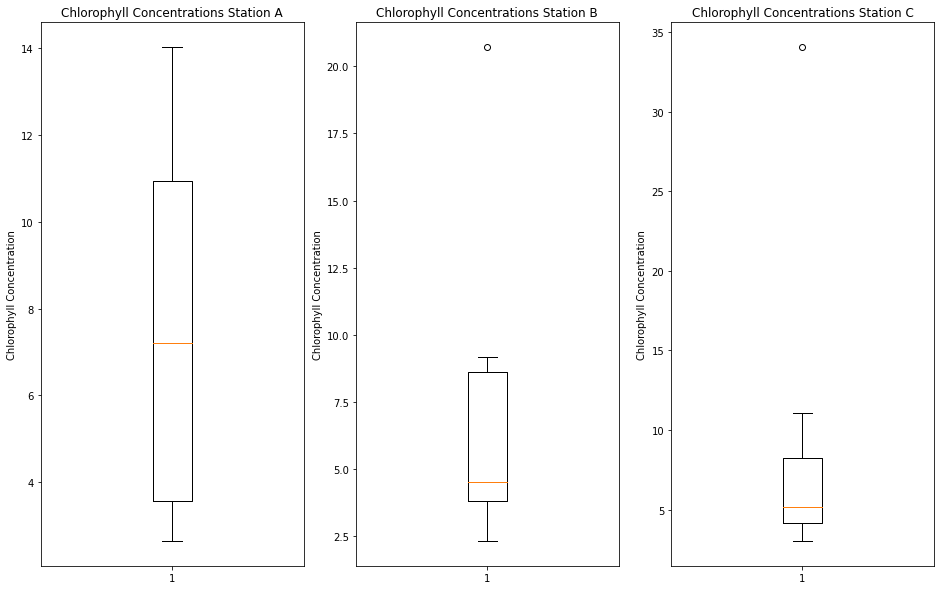

In [36]:
#Lastly, creating side-by-side box and whisker plot to describe the readings
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.boxplot(Station_A)
plt.ylabel("Chlorophyll Concentration")
plt.title("Chlorophyll Concentrations Station A")

plt.subplot(132)
plt.boxplot(Station_B)
plt.ylabel("Chlorophyll Concentration")
plt.title("Chlorophyll Concentrations Station B")

plt.subplot(133)
plt.boxplot(Station_C)
plt.ylabel("Chlorophyll Concentration")
plt.title("Chlorophyll Concentrations Station C")

In [45]:
#Part D: Computing correlation coefficients between each of the stations and printing them
from scipy.stats import pearsonr
Corr_AB = pearsonr(Station_A,Station_B)[0]
Corr_AC = pearsonr(Station_A,Station_C)[0]
Corr_BC = pearsonr(Station_B,Station_C)[0]
corlist = [Corr_AB,Corr_AC,Corr_BC]
cornames = ['Corr_AB','Corr_AC','Corr_BC']
for i in range(0,3):
    print(f'The correlation coefficient {cornames[i]} has a value of {corlist[i]}')

The correlation coefficient Corr_AB has a value of 0.5862311610209664
The correlation coefficient Corr_AC has a value of 0.1619779717943397
The correlation coefficient Corr_BC has a value of -0.08443637095782147
